In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


19:49:26 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=70053;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=504489;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


19:49:27 INFO      Starting 3ML!                                                                     ]8;id=463639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=260452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=659537;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=259753;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=768318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=678844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=535938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=430927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

19:49:27 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=221844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=605024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

19:49:28 WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=636256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=993766;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=965686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=96939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

19:49:28 WARNING   No fermitools installed                                              ]8;id=255584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=308163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 40.85it/s]   

Yourlib init successfully!!!


Best fit values:

result   
parameter                                                                  
J1843M0335u.spectrum.main.Powerlaw.K      (1.331 -0.013 +0.014) x 10^-21  \
J1843M0335u.spectrum.main.Powerlaw.index            -2.43000 +/- 0.00004   
J1848M0153u.Gaussian_on_sphere.lon0           (2.8219 +/- 0.0004) x 10^2   
J1848M0153u.Gaussian_on_sphere.lat0                       -1.84 +/- 0.04   
J1848M0153u.Gaussian_on_sphere.sigma           (3.600 +/- 0.028) x 10^-1   
J1848M0153u.spectrum.main.Powerlaw.K         (3.32 -0.29 +0.32) x 10^-22   
J1848M0153u.spectrum.main.Powerlaw.index                  -2.62 +/- 0.06   
J1850M0004u.Gaussian_on_sphere.lon0         (2.82728 +/- 0.00028) x 10^2   
J1850M0004u.Gaussian_on_sphere.lat0               (-9.6 +/- 2.7) x 10^-2   
J1850M0004u.Gaussian_on_sphere.sigma             (4.51 +/- 0.23) x 10^-1   
J1850M0004u.spectrum.main.Powerlaw.K              (5.1 +/- 0.4) x 10^-22   
J1850M0004u.spectrum.main.Powerlaw.index                  -2.44 +/- 0.04   
J1852P0050u.Gaussian_on_sphere.lon0           (2.8384 +/- 0.0013) x 10^2   
J1852P0050u.Gaussian_on_sphere.lat0                        1.24 +/- 0.13   
J1852P0050u.Gaussian_on_sphere.sigma               (4.5 +/- 0.8) x 10^-1   
J1852P0050u.spectrum.main.Powerlaw.K          (1.59 -0.34 +0.4) x 10^-22   
J1852P0050u.spectrum.main.Powerlaw.index                  -2.62 +/- 0.10   
J1857P0245.Gaussian_on_sphere.lon0          (2.84376 +/- 0.00023) x 10^2   
J1857P0245.Gaussian_on_sphere.lat0                         2.75 +/- 0.04   
J1857P0245.Gaussian_on_sphere.sigma              (2.09 +/- 0.28) x 10^-1   
J1857P0245.spectrum.main.Powerlaw.K               (3.1 +/- 0.4) x 10^-22   
J1857P0245.spectrum.main.Powerlaw.index                   -2.83 +/- 0.05   
J1857P0203u.Gaussian_on_sphere.lon0         (2.84503 +/- 0.00031) x 10^2   
J1857P0203u.Gaussian_on_sphere.lat0                        1.98 +/- 0.04   
J1857P0203u.Gaussian_on_sphere.sigma             (2.02 +/- 0.31) x 10^-1   
J1857P0203u.spectrum.main.Powerlaw.K          (1.81 -0.33 +0.4) x 10^-22   
J1857P0203u.spectrum.main.Powerlaw.index                  -2.48 +/- 0.08   
J1858P0330.Gaussian_on_sphere.lon0            (2.8482 +/- 0.0009) x 10^2   
J1858P0330.Gaussian_on_sphere.lat0                         3.44 +/- 0.09   
J1858P0330.Gaussian_on_sphere.sigma                (4.5 +/- 0.6) x 10^-1   
J1858P0330.spectrum.main.Powerlaw.K             (1.8 -0.4 +0.5) x 10^-22   
J1858P0330.spectrum.main.Powerlaw.index                   -2.52 +/- 0.10   
J1902P0648.spectrum.main.Powerlaw.K               (4.0 -2.1 +4) x 10^-23   
J1902P0648.spectrum.main.Powerlaw.index                     -2.5 +/- 0.6   
J1906P0712.spectrum.main.Powerlaw.K               (0.0 +/- 1.2) x 10^-13   
J1906P0712.spectrum.main.Powerlaw.index                     -2.0 +/- 1.1   
J1908P0615u.spectrum.main.Powerlaw.K            (6.4 -0.7 +0.8) x 10^-22   
J1908P0615u.spectrum.main.Powerlaw.index                  -2.43 +/- 0.07   
J1910P0516.Gaussian_on_sphere.lon0            (2.8773 +/- 0.0017) x 10^2   
J1910P0516.Gaussian_on_sphere.lat0                         5.49 +/- 0.15   
J1910P0516.Gaussian_on_sphere.sigma            (7.400 +/- 0.006) x 10^-1   
J1910P0516.spectrum.main.Powerlaw.K             (3.3 -0.5 +0.6) x 10^-22   
J1910P0516.spectrum.main.Powerlaw.index                   -2.41 +/- 0.10   
Diffuse.spectrum.main.Powerlaw.K             (4.82 -0.18 +0.19) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                    -2.610 +/- 0.025   

                                                     unit  
parameter                                                  
J1843M0335u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1843M0335u.spectrum.main.Powerlaw.index                   
J1848M0153u.Gaussian_on_sphere.lon0                   deg  
J1848M0153u.Gaussian_on_sphere.lat0                   deg  
J1848M0153u.Gaussian_on_sphere.sigma                  deg  
J1848M0153u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1848M0153u.s

Correlation matrix:

1.00 -0.00  0.04  0.06 -0.01 -0.06 ... -0.00 -0.00 -0.00 -0.00 -0.03  0.01
-0.00  1.00 -0.00 -0.00  0.00  0.00 ...  0.00 -0.00  0.00 -0.00  0.00  0.00
 0.04 -0.00  1.00  0.24 -0.01 -0.05 ...  0.02  0.00  0.00  0.00  0.12  0.04
 0.06 -0.00  0.24  1.00 -0.02 -0.07 ...  0.00  0.00  0.00  0.00  0.04 -0.01
-0.01  0.00 -0.01 -0.02  1.00  0.14 ... -0.00 -0.00  0.00 -0.00 -0.04 -0.01
-0.06  0.00 -0.05 -0.07  0.14  1.00 ... -0.04 -0.00  0.00 -0.02 -0.37  0.12
 0.04 -0.00 -0.02  0.07  0.01 -0.69 ...  0.01  0.00 -0.01  0.02  0.16 -0.25
-0.00 -0.00  0.00  0.04  0.00 -0.02 ...  0.01  0.00  0.00  0.00  0.08  0.02
 0.01 -0.00  0.08  0.16  0.03  0.06 ...  0.00  0.00  0.00  0.00  0.03 -0.00
-0.01  0.00 -0.09 -0.16 -0.03 -0.04 ... -0.01 -0.00 -0.00 -0.00 -0.08 -0.03
-0.00 -0.00 -0.10 -0.16 -0.02 -0.03 ... -0.02 -0.00  0.00 -0.02 -0.25  0.10
  ...   ...   ...   ...   ...   ... ...   ...   ...   ...   ...   ...   ...
-0.00  0.00  0.01  0.00 -0.00 -0.05 ... -0.00  0.00 -0.03  0.03  0.14 -0.14
 0.00 -0.00 -0.00 -0.00  0.00  0.00 ...  0.00 -0.00  0.01 -0.00 -0.01  0.01
 0.00 -0.00 -0.00 -0.00  0.00  0.00 ...  0.00 -0.00  0.00 -0.00 -0.00  0.00
 0.01 -0.00 -0.02 -0.01  0.01  0.07 ... -0.26  0.02 -0.53  0.34 -0.20  0.11
-0.00 -0.00  0.00  0.00 -0.00 -0.04 ... -0.08  0.00  0.19 -0.38  0.12 -0.15
-0.00  0.00  0.01  0.00 -0.00 -0.02 ...  0.20  0.00  0.02  0.29  0.05 -0.00
-0.00  0.00  0.02  0.00 -0.00 -0.04 ...  1.00 -0.06  0.63  0.21  0.10 -0.01
-0.00 -0.00  0.00  0.00 -0.00 -0.00 ... -0.06  1.00 -0.08 -0.00  0.00 -0.00
-0.00  0.00  0.00  0.00  0.00  0.00 ...  0.63 -0.08  1.00 -0.42 -0.00  0.03
-0.00 -0.00  0.00  0.00 -0.00 -0.02 ...  0.21 -0.00 -0.42  1.00  0.07 -0.06
-0.03  0.00  0.12  0.04 -0.04 -0.37 ...  0.10  0.00 -0.00  0.07  1.00 -0.42
 0.01  0.00  0.04 -0.01 -0.01  0.12 ... -0.01 -0.00  0.03 -0.06 -0.42  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8965.829195
total       8965.829195

Values of statistical measures:

statistical measures
AIC          18021.681042
BIC          18476.887016

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

21:50:15 INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=488526;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=706210;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=481148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=255314;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=919467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=146542;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.838                      ]8;id=748497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=798674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=3007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=535500;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.096                      ]8;id=34223;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=474286;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=36961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=86740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.243                       ]8;id=839936;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=66859;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=413952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=991150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.747                       ]8;id=865022;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=55344;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=143655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=994273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.982                       ]8;id=17582;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=25582;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=989853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=918890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.438                       ]8;id=230112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=903644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=8795;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=796258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=436823;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=599999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=971720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=428350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=266308;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=129454;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=641700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=782701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.490                       ]8;id=945578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=41862;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=931246;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=845875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.970                       ]8;id=121699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=425050;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

(286.61132812499994, -1.977395325411706)


<Figure size 640x480 with 0 Axes>

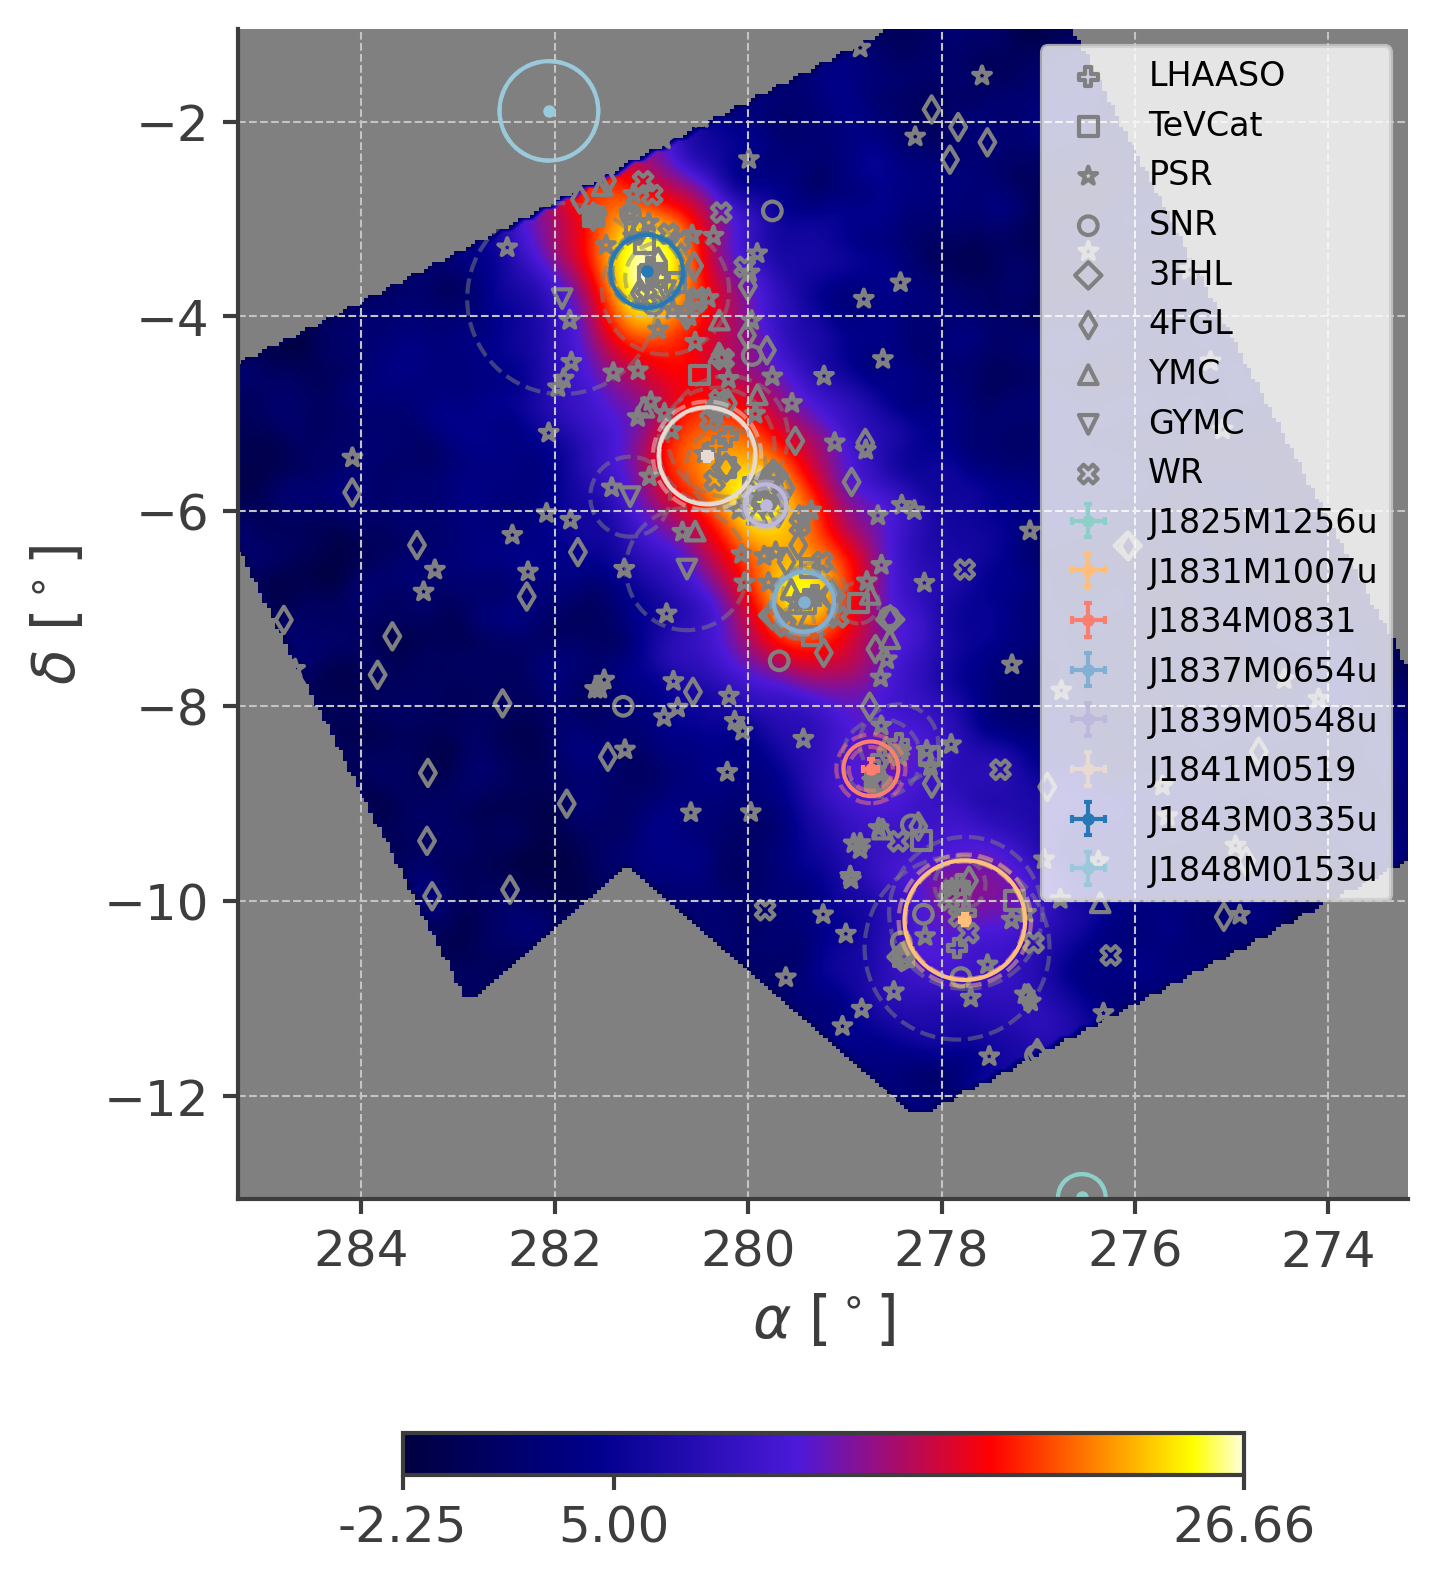

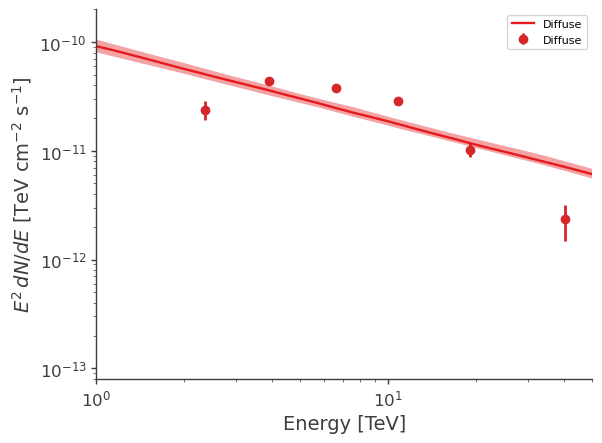

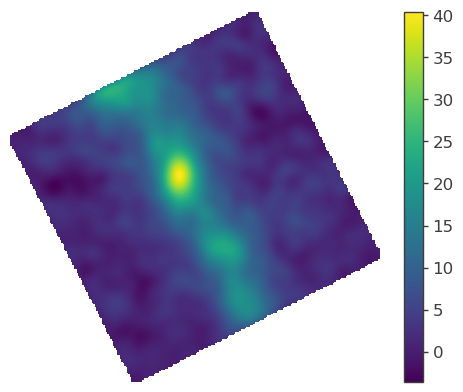

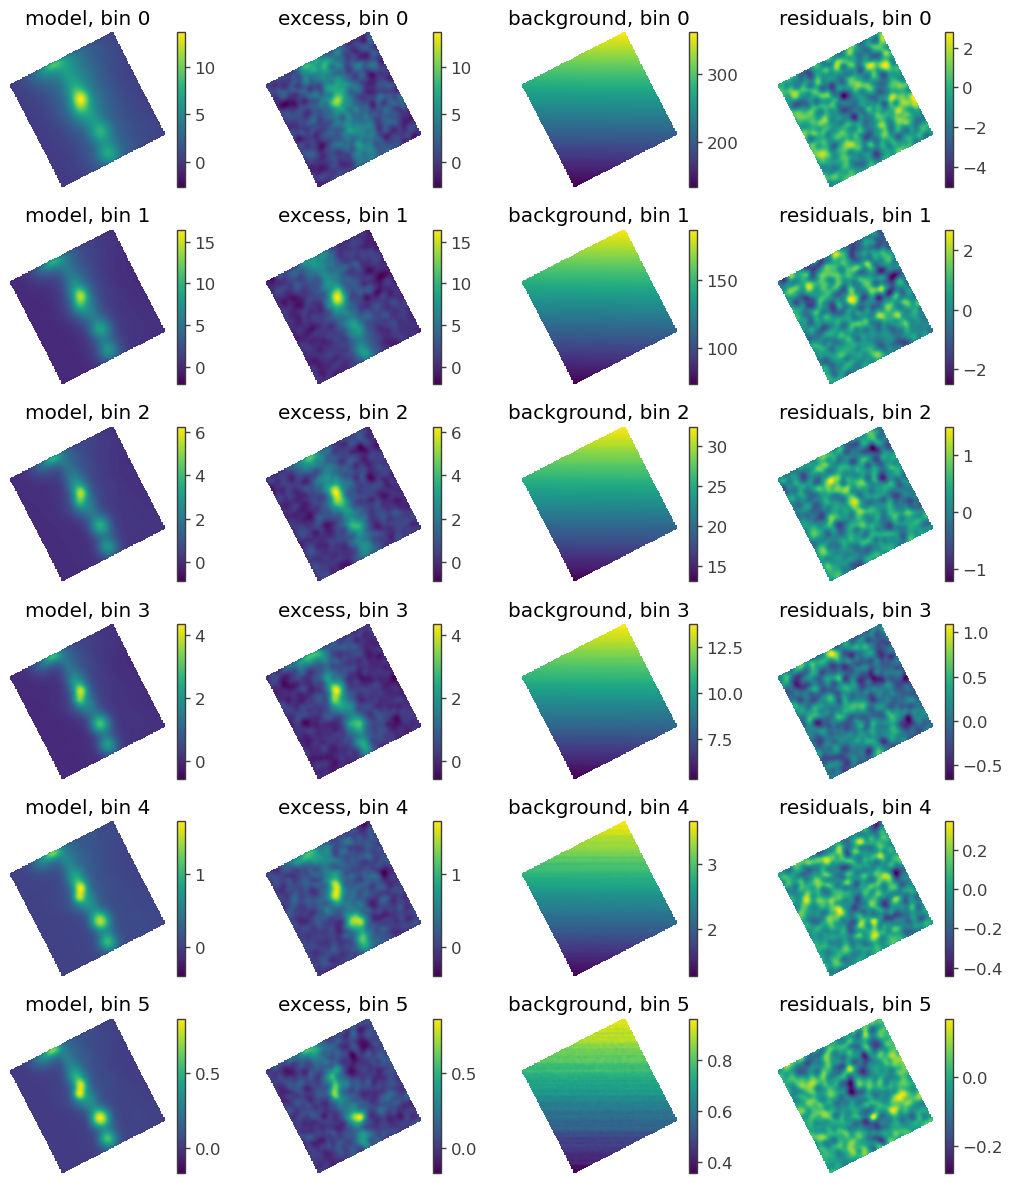

<Figure size 640x480 with 0 Axes>

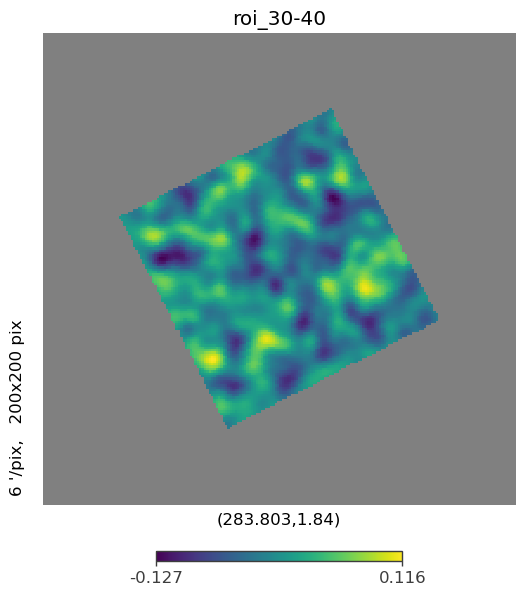

LHAASO:  1 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  2 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  3 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  4 282.02 -1.78 1LHAASO J1848-0153u   0.56
LHAASO:  5 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  6 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  7 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  8 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  9 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  10 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  11 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  12 284.38 2.06  1WCDA J1857+0203u  0.28
LHAASO:  13 284.5 1.98  1LHAASO J1857+0203u   0.19
LHAASO:  14 284.59 3.51  1LHAASO J1858+0330  0.43
LHAASO:  15 284.79 3.7  1LHAASO J1858+0330   0.52
LHAASO:  16 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  17 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  18 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  19 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  20 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAAS

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.90 +/- 0.23) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1515.748864
total       1515.748864

Values of statistical measures:

statistical measures
AIC            3033.49775
BIC            3043.61392

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (5.39 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1537.517516
total       1537.517516

Values of statistical measures:

statistical measures
AIC           3077.035054
BIC           3087.151224

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (6.53 +/- 0.26) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1552.285165
total       1552.285165

Values of statistical measures:

statistical measures
AIC           3106.570353
BIC           3116.686522

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (5.70 +/- 0.24) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1491.589445
total       1491.589445

Values of statistical measures:

statistical measures
AIC           2985.178912
BIC           2995.295081

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.54 +/- 0.29) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1379.929037
total       1379.929037

Values of statistical measures:

statistical measures
AIC           2761.858096
BIC           2771.974266

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.82 +/- 0.32) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1401.736281
total       1401.736281

Values of statistical measures:

statistical measures
AIC           2805.472583
BIC           2815.588753


100%|██████████| 6/6 [00:37<00:00,  6.28s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

21:52:14 INFO      Region of Interest:                                                                   ]8;id=896250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=256497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=624290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=693703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (288.428, 10.724), model radius:      ]8;id=279893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=769512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=113730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=119148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=687651;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=422118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=665426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=826193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=257432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=191439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=952766;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=768428;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=466572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=151156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=9753;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=184396;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=363693;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=188519;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=446637;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=686727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=357594;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=321670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=778475;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=950365;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=514660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=144958;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=131290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=591078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=504256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=965317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.237750e+07  1.231712e+07  1.004902          30455  \
1   1   1024   RING  6.369569e+06  6.300819e+06  1.010911          30455   
2   2   1024   RING  1.108544e+06  1.085252e+06  1.021462          30455   
3   3   1024   RING  4.757899e+05  4.600890e+05  1.034126          30455   
4   4   1024   RING  1.287373e+05  1.218636e+05  1.056404          30455   
5   5   1024   RING  3.458448e+04  3.178466e+04  1.088087          30455   

   Area (deg^2)  
0     99.846437  
1     99.846437  
2     99.846437  
3     99.846437  
4     99.846437  
5     99.846437

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=607688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=839508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=467285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=683432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=772840;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=706408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=688516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=869031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=435847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=404379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=338189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=928506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:52:15 INFO      J1902P0648 in roi: 6.0 sf:False pf:False kf:False indexf:False                      ]8;id=280135;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=807032;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=645356;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=840918;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=4.50e-14 kb=(1.00e-18, 1.75e-13) index=-2.39 indexb=(-3.29,-1.49)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=521497;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=159468;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#338\338]8;;\

         INFO      J1906P0712 in roi: 6.0 sf:False pf:False kf:False indexf:False                      ]8;id=953004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=981916;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=820582;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=845356;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=1.01e-13 kb=(1.00e-18, 3.51e-13) index=-2.72 indexb=(-3.47,-1.97)                             

         INFO      Mor:                                                                                ]8;id=402852;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=902343;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.21 sb=(0.00,0.46) fitrange=1.05                                                         

         INFO      J1907P0826 in roi: 6.0 sf:False pf:False kf:False indexf:False                      ]8;id=100599;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=749183;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=525249;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=702942;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=1.34e-13 kb=(1.00e-18, 4.24e-13) index=-2.62 indexb=(-3.32,-1.92)                             

         INFO      Mor:                                                                                ]8;id=153914;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=261604;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.43 sb=(0.03,0.83) fitrange=1.55                                                         

         INFO      J1908P0615u in roi: 6.0 sf:False pf:False kf:False indexf:False                     ]8;id=205180;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=101352;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=875014;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=821888;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=7.97e-13 kb=(2.57e-13, 1.34e-12) index=-2.42 indexb=(-2.57,-2.27)                             

         INFO      Mor:                                                                                ]8;id=807522;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=802512;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.43 sb=(0.33,0.53) fitrange=0.25                                                         

         INFO      J1910P0516 in model_radius: 7.0 sf:True pf:True kf:False indexf:False               ]8;id=36338;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=430129;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#313\313]8;;\

         INFO      Spec:                                                                               ]8;id=510802;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=866140;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=8.60e-14 kb=(1.00e-18, 3.76e-13) index=-2.54 indexb=(-3.29,-1.79)                             

         INFO      Mor:                                                                                ]8;id=147789;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=480769;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.29 sb=(0.00,0.74) fitrange=1.90                                                         

         INFO      J1912P1014u in roi: 6.0 sf:False pf:False kf:False indexf:False                     ]8;id=879929;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=563276;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=475894;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=710529;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=3.07e-13 kb=(6.70e-14, 5.47e-13) index=-2.68 indexb=(-2.98,-2.38)                             

         INFO      Mor:                                                                                ]8;id=947618;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=127314;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.36 sb=(0.21,0.51) fitrange=0.40                                                         

         INFO      J1914P1150u in roi: 6.0 sf:False pf:False kf:False indexf:False                     ]8;id=342592;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=29832;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=80266;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=439473;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=1.09e-13 kb=(1.00e-18, 2.29e-13) index=-2.34 indexb=(-2.69,-1.99)                             

         INFO      Mor:                                                                                ]8;id=295227;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=213741;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.33 sb=(0.13,0.53) fitrange=0.70                                                         

         INFO      J1922P1403 in roi: 6.0 sf:False pf:False kf:False indexf:False                      ]8;id=990031;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=301891;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=145257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=574730;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=1.37e-13 kb=(3.70e-14, 2.37e-13) index=-2.62 indexb=(-2.97,-2.27)                             

         INFO      Mor:                                                                                ]8;id=842156;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=428495;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.18 sb=(0.08,0.28) fitrange=0.35                                                         

         INFO      J1924P1609 in model_radius: 7.0 sf:True pf:True kf:False indexf:False               ]8;id=117063;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=719700;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#313\313]8;;\

         INFO      Spec:                                                                               ]8;id=994830;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=415374;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=4.44e-13 kb=(3.40e-14, 8.54e-13) index=-2.54 indexb=(-2.94,-2.14)                             

         INFO      Mor:                                                                                ]8;id=833543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=768265;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=1.45 sb=(0.90,2.00) fitrange=2.15                                                         

         INFO      Set diffuse range: [36, 52] [-8, 8]                                                 ]8;id=874892;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=15745;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#978\978]8;;\

         INFO      ra dec coner:                                                                       ]8;id=974226;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=115579;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#979\979]8;;\

         INFO      (291.3734095715683, -0.9333861386465837)                                            ]8;id=572730;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=404331;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#980\980]8;;\

         INFO      (299.0292661469791, 12.971192391637747)                                             ]8;id=764087;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=337223;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#981\981]8;;\

         INFO      (284.3072053919512, 20.571897552965403)                                             ]8;id=874591;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=814340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#982\982]8;;\

         INFO      (277.1024382189087, 6.351715544083082)                                              ]8;id=257044;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=396833;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#983\983]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=361716;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=745243;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1022\1022]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 9.926864854876973e-06                                                 ]8;id=691855;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=41331;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1023\1023]8;;\
                  ratio: 0.07833842134781312                                                                       

         INFO      set K to: 1.4045753683395425e-12                                                   ]8;id=950016;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=298979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1024\1024]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_freeprm_dust_bkg_template.fits          ]8;id=445979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=193872;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1051\1051]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  9
Particle sources  0

Free parameters (40):
--------------------

                                           value min_value max_value   
J1902P0648.position.ra                    285.58    285.08    286.08  \
J1902P0648.position.dec                      6.8       6.3       7.3   
J1902P0648.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1902P0648.spectrum.main.Powerlaw.index    -2.39     -3.29     -1.49   
J1906P0712.Gaussian_on_sphere.lon0        286.56    285.51    287.61   
J1906P0712.Gaussian_on_sphere.lat0           7.2      6.15      8.25   
J1906P0712.Gaussian_on_sphere.sigma         0.21       0.0      0.46   
J1906P0712.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1906P0712.spectrum.main.Powerlaw.index    -2.72     -3.47     -1.97   
J1907P0826.Gaussian_on_sphere.lon0        286.96    285.41    288.51   
J1907P0826.Gaussian_on_sphere.lat0          8.44      6.89      9.99   
J1907P0826.Gaussian_on_sphere.sigma         0.43      0.03      0.83   
J1907P0826.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1907P0826.spectrum.main.Powerlaw.index    -2.62     -3.32     -1.92   
J1908P0615u.Gaussian_on_sphere.lon0       287.05     286.8     287.3   
J1908P0615u.Gaussian_on_sphere.lat0         6.26      6.01      6.51   
J1908P0615u.Gaussian_on_sphere.sigma        0.43      0.33      0.53   
J1908P0615u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index   -2.42     -2.57     -2.27   
J1910P0516.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index    -2.54     -3.29     -1.79   
J1912P1014u.Gaussian_on_sphere.lon0       288.22    287.82    288.62   
J1912P1014u.Gaussian_on_sphere.lat0        10.25      9.85     10.65   
J1912P1014u.Gaussian_on_sphere.sigma        0.36      0.21      0.51   
J1912P1014u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index   -2.68     -2.98     -2.38   
J1914P1150u.Gaussian_on_sphere.lon0       288.81    288.11    289.51   
J1914P1150u.Gaussian_on_sphere.lat0        11.74     11.04     12.44   
J1914P1150u.Gaussian_on_sphere.sigma        0.33      0.13      0.53   
J1914P1150u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1914P1150u.spectrum.main.Powerlaw.index   -2.34     -2.69     -1.99   
J1922P1403.Gaussian_on_sphere.lon0         290.7    290.35    291.05   
J1922P1403.Gaussian_on_sphere.lat0         14.06     13.71     14.41   
J1922P1403.Gaussian_on_sphere.sigma         0.18      0.08      0.28   
J1922P1403.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1922P1403.spectrum.main.Powerlaw.index    -2.62     -2.97     -2.27   
J1924P1609.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1924P1609.spectrum.main.Powerlaw.index    -2.54     -2.94     -2.14   
Diffuse.spectrum.main.Powerlaw.K             0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.733      -4.0      -1.0   

                                                    unit  
J1902P0648.position.ra                               deg  
J1902P0648.position.dec                              deg  
J1902P0648.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1902P0648.spectrum.main.Powerlaw.index                   
J1906P0712.Gaussian_on_sphere.lon0                   deg  
J1906P0712.Gaussian_on_sphere.lat0                   deg  
J1906P0712.Gaussian_on_sphere.sigma                  deg  
J1906P0712.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1906P0712.spectrum.main.Powerlaw.index                   
J1907P0826.Gaussian_on_sphere.lon0                   deg  
J1907P0826.Gaussian_on_sphere.lat0                   deg  
J1907P0826.Gaussian_on_sphere.sigma                  deg  
J1907P0826.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1907P0826.spectrum.main.Powerlaw.index                   
J1908P

21:52:17 INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=404308;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=919029;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=719266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=290933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1907P0826            ]8;id=281882;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=164685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=182653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=380275;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=86547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=10886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=335497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=25737;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=958268;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=987474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=656106;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=703508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=454186;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=551670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=863301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=687523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=660331;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=320008;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=213444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=456449;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=941360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=195887;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=277209;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=811661;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1924P1609            ]8;id=185235;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=345280;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=457494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=455618;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=945513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=187728;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 9.953                       ]8;id=795428;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=882083;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=357769;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=443454;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=219264;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=789047;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                
J1902P0648.position.ra                    (2.85600 +/- 0.00031) x 10^2  \
J1902P0648.position.dec                                6.837 +/- 0.028   
J1902P0648.spectrum.main.Powerlaw.K           (4.0 -0.9 +1.2) x 10^-23   
J1902P0648.spectrum.main.Powerlaw.index                 -2.35 +/- 0.16   
J1906P0712.Gaussian_on_sphere.lon0          (2.8659 +/- 0.0005) x 10^2   
J1906P0712.Gaussian_on_sphere.lat0                       7.20 +/- 0.08   
J1906P0712.Gaussian_on_sphere.sigma              (2.4 +/- 0.5) x 10^-1   
J1906P0712.spectrum.main.Powerlaw.K        (1.06 -0.22 +0.28) x 10^-22   
J1906P0712.spectrum.main.Powerlaw.index                 -2.64 +/- 0.11   
J1907P0826.Gaussian_on_sphere.lon0          (2.8696 +/- 0.0010) x 10^2   
J1907P0826.Gaussian_on_sphere.lat0                       8.49 +/- 0.15   
J1907P0826.Gaussian_on_sphere.sigma              (4.9 +/- 1.0) x 10^-1   
J1907P0826.spectrum.main.Powerlaw.K        (1.10 -0.23 +0.29) x 10^-22   
J1907P0826.spectrum.main.Powerlaw.index                 -2.60 +/- 0.14   
J1908P0615u.Gaussian_on_sphere.lon0       (2.87092 +/- 0.00017) x 10^2   
J1908P0615u.Gaussian_on_sphere.lat0                    6.261 +/- 0.020   
J1908P0615u.Gaussian_on_sphere.sigma           (4.35 +/- 0.17) x 10^-1   
J1908P0615u.spectrum.main.Powerlaw.K            (8.1 +/- 0.4) x 10^-22   
J1908P0615u.spectrum.main.Powerlaw.index              -2.409 +/- 0.024   
J1910P0516.spectrum.main.Powerlaw.K         (1.40 -0.30 +0.4) x 10^-22   
J1910P0516.spectrum.main.Powerlaw.index                 -2.58 +/- 0.18   
J1912P1014u.Gaussian_on_sphere.lon0       (2.88228 +/- 0.00027) x 10^2   
J1912P1014u.Gaussian_on_sphere.lat0           (1.0198 +/- 0.0028) x 10   
J1912P1014u.Gaussian_on_sphere.sigma           (3.35 +/- 0.24) x 10^-1   
J1912P1014u.spectrum.main.Powerlaw.K       (2.54 -0.16 +0.17) x 10^-22   
J1912P1014u.spectrum.main.Powerlaw.index                -2.69 +/- 0.05   
J1914P1150u.Gaussian_on_sphere.lon0       (2.88772 +/- 0.00032) x 10^2   
J1914P1150u.Gaussian_on_sphere.lat0           (1.1771 +/- 0.0032) x 10   
J1914P1150u.Gaussian_on_sphere.sigma       (1.3000 +/- 0.0032) x 10^-1   
J1914P1150u.spectrum.main.Powerlaw.K          (4.9 -0.9 +1.2) x 10^-23   
J1914P1150u.spectrum.main.Powerlaw.index                -2.27 +/- 0.14   
J1922P1403.Gaussian_on_sphere.lon0        (2.90739 +/- 0.00021) x 10^2   
J1922P1403.Gaussian_on_sphere.lat0            (1.4111 +/- 0.0022) x 10   
J1922P1403.Gaussian_on_sphere.sigma            (1.44 +/- 0.23) x 10^-1   
J1922P1403.spectrum.main.Powerlaw.K        (1.10 -0.10 +0.11) x 10^-22   
J1922P1403.spectrum.main.Powerlaw.index                 -2.53 +/- 0.07   
J1924P1609.spectrum.main.Powerlaw.K         (3.400 +/- 0.008) x 10^-23   
J1924P1609.spectrum.main.Powerlaw.index                   -2.6 +/- 0.9   
Diffuse.spectrum.main.Powerlaw.K           (2.93 -0.13 +0.14) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                    -2.54 +/- 0.04   

                                                     unit  
parameter                                                  
J1902P0648.position.ra                                deg  
J1902P0648.position.dec                               deg  
J1902P0648.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1902P0648.spectrum.main.Powerlaw.index                    
J1906P0712.Gaussian_on_sphere.lon0                    deg  
J1906P0712.Gaussian_on_sphere.lat0                    deg  
J1906P0712.Gaussian_on_sphere.sigma                   deg  
J1906P0712.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1906P0712.spectrum.main.Powerlaw.index                    
J1907P0826.Gaussian_on_sphere.lon0                    deg  
J1907P0826.Gaussian_on_sphere.lat0                    deg  
J1907P0826.Gaussian_on_sphere.sigma                   deg  
J1907P0826.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1907P0826.spectrum.main.Powerlaw.index                

Correlation matrix:

1.00  0.07 -0.04  0.07  0.06  0.05 ... -0.00  0.00 -0.00  0.00  0.01 -0.01
 0.07  1.00 -0.01  0.03  0.03  0.03 ...  0.00 -0.00  0.00  0.00 -0.01 -0.01
-0.04 -0.01  1.00 -0.87  0.08  0.07 ...  0.05 -0.03  0.00  0.00 -0.13  0.05
 0.07  0.03 -0.87  1.00 -0.05 -0.04 ... -0.04  0.03 -0.00  0.01  0.09 -0.08
 0.06  0.03  0.08 -0.05  1.00 -0.00 ... -0.00 -0.00 -0.00 -0.00  0.01  0.02
 0.05  0.03  0.07 -0.04 -0.00  1.00 ...  0.01  0.00  0.00  0.01 -0.03 -0.05
-0.08 -0.05 -0.10  0.06  0.28 -0.24 ...  0.02 -0.00  0.00  0.01 -0.04 -0.01
-0.06 -0.05 -0.11  0.08  0.32 -0.38 ...  0.04 -0.02  0.00 -0.01 -0.09  0.07
-0.01 -0.01  0.06 -0.06 -0.11 -0.00 ... -0.03  0.04 -0.00  0.03  0.08 -0.18
-0.01  0.00  0.02 -0.01 -0.03  0.08 ...  0.06 -0.01  0.00  0.02 -0.14 -0.05
-0.00 -0.00  0.00  0.00  0.22  0.28 ...  0.04 -0.00  0.00  0.02 -0.09 -0.06
  ...   ...   ...   ...   ...   ... ...   ...   ...   ...   ...   ...   ...
-0.00 -0.00 -0.00  0.00 -0.00 -0.00 ... -0.00  0.00 -0.00 -0.00  0.01  0.00
-0.00  0.00  0.04 -0.03 -0.00  0.01 ...  0.12 -0.06  0.00 -0.00 -0.33  0.15
 0.00 -0.00 -0.03  0.03 -0.00  0.00 ... -0.09  0.06 -0.00  0.02  0.23 -0.20
 0.00 -0.00 -0.01  0.00  0.00 -0.00 ... -0.05  0.03 -0.00 -0.01  0.05 -0.00
-0.00  0.00  0.00 -0.00 -0.00  0.00 ...  0.00 -0.01 -0.00 -0.02 -0.01  0.00
-0.00  0.00  0.03 -0.01 -0.00  0.01 ...  0.47  0.07 -0.01 -0.05 -0.20 -0.01
-0.00  0.00  0.05 -0.04 -0.00  0.01 ...  1.00 -0.55 -0.01  0.01 -0.39  0.14
 0.00 -0.00 -0.03  0.03 -0.00  0.00 ... -0.55  1.00  0.00 -0.10  0.19 -0.20
-0.00  0.00  0.00 -0.00 -0.00  0.00 ... -0.01  0.00  1.00 -0.00 -0.02  0.00
 0.00  0.00  0.00  0.01 -0.00  0.01 ...  0.01 -0.10 -0.00  1.00 -0.01 -0.17
 0.01 -0.01 -0.13  0.09  0.01 -0.03 ... -0.39  0.19 -0.02 -0.01  1.00 -0.34
-0.01 -0.01  0.05 -0.08  0.02 -0.05 ...  0.14 -0.20  0.00 -0.17 -0.34  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8701.472891
total       8701.472891

Values of statistical measures:

statistical measures
AIC          17482.963736
BIC          17887.576379

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

22:07:14 INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=770395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=203836;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.201                       ]8;id=454069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=441308;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1907P0826            ]8;id=389957;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=825699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.485                       ]8;id=187040;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=989393;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=468299;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=347273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.261                       ]8;id=154162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=273798;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=829885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=833206;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=446986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=896007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=36289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=284784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.198                      ]8;id=54724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=731654;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=287578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=75379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.771                      ]8;id=382779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=182397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1922P1403            ]8;id=202600;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=994564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.111                      ]8;id=420326;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=128406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1924P1609            ]8;id=974083;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218729;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=207777;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=771117;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=335618;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=467817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 9.953                       ]8;id=724688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=5748;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

(289.73144531249994, 5.079715792733467)


<Figure size 640x480 with 0 Axes>

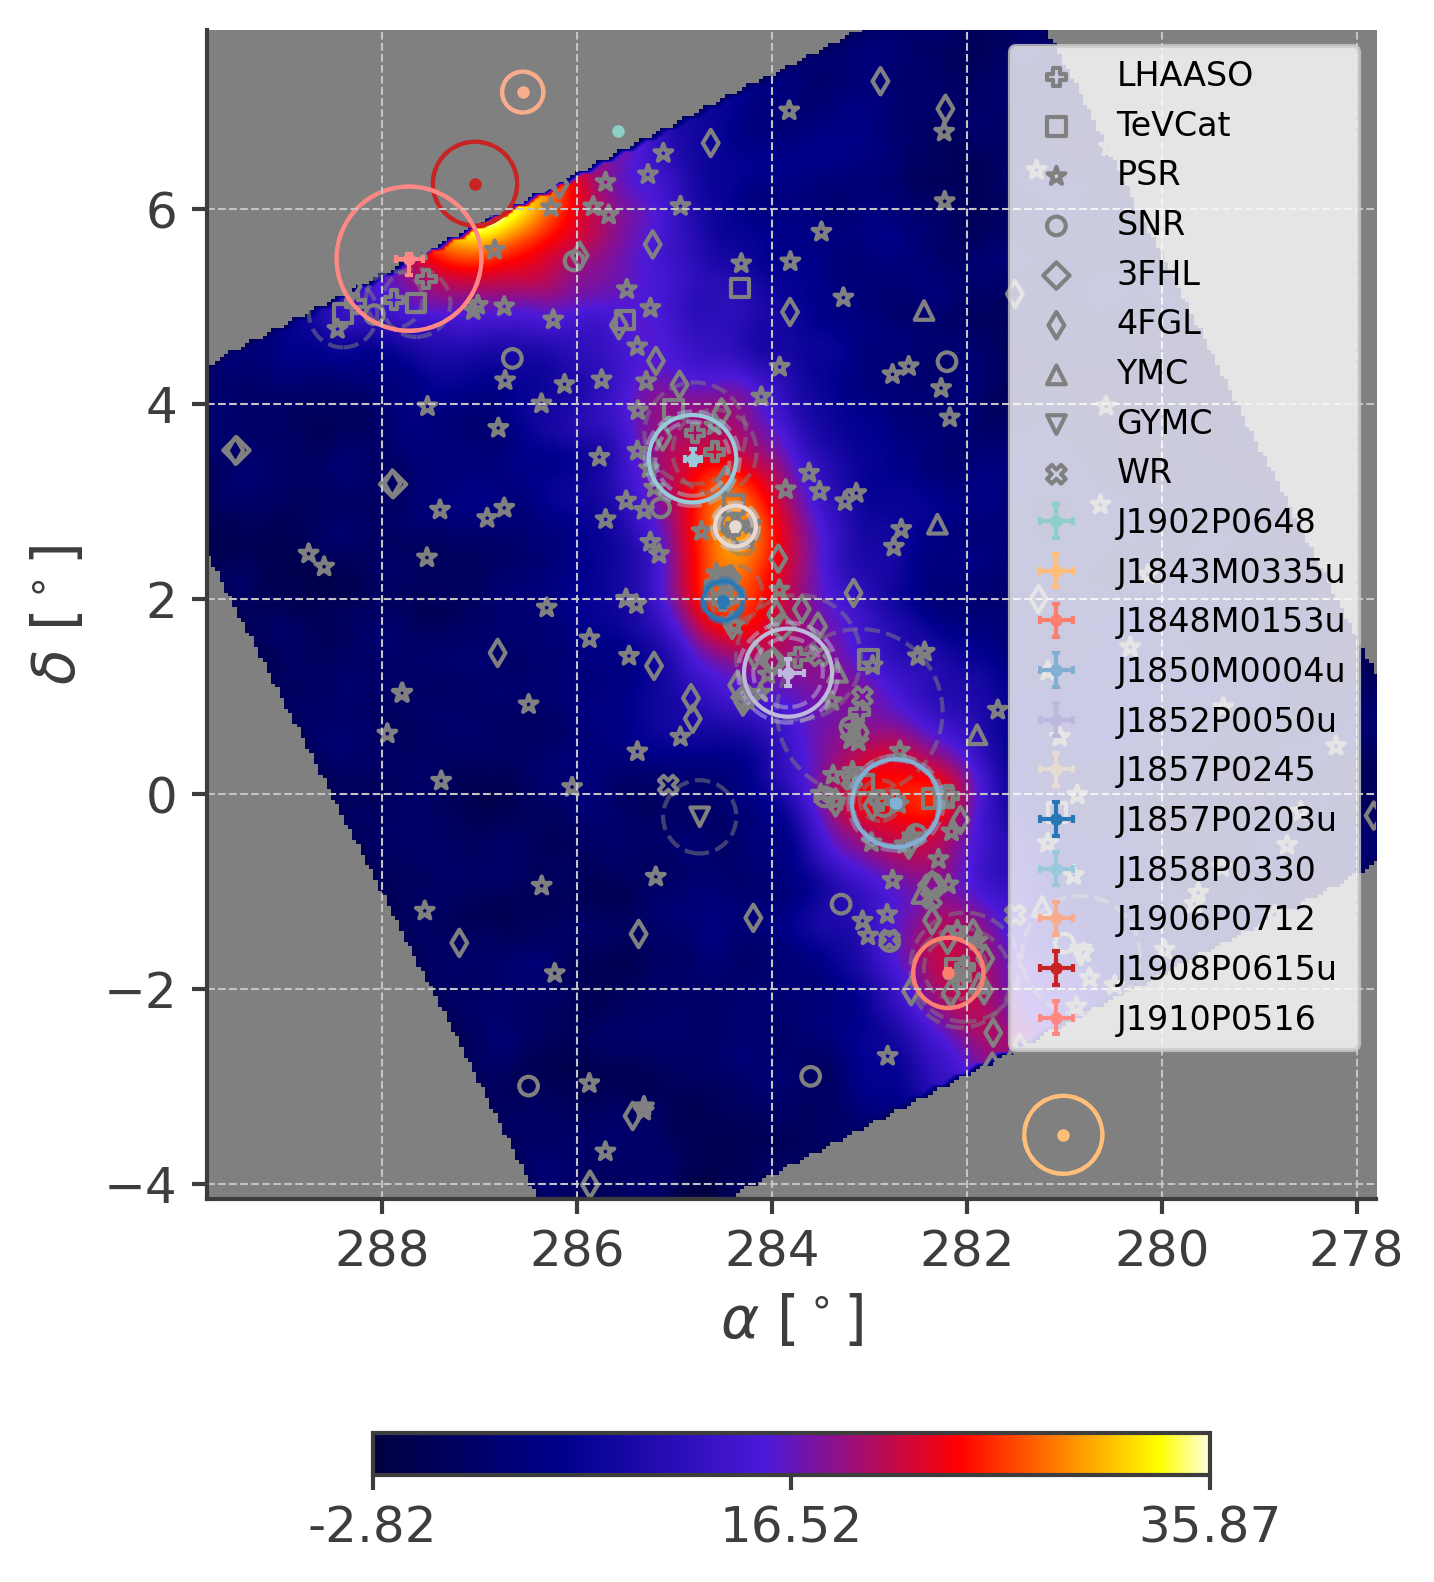

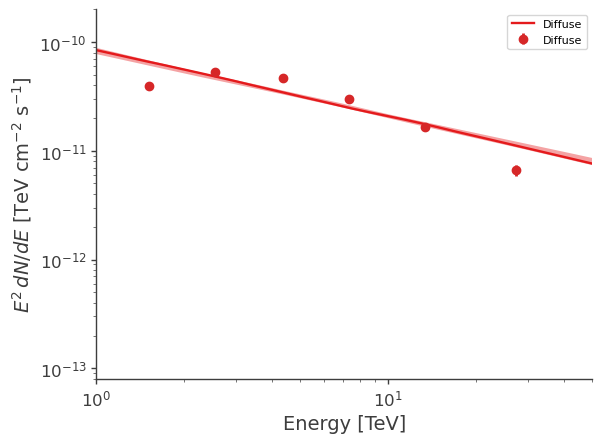

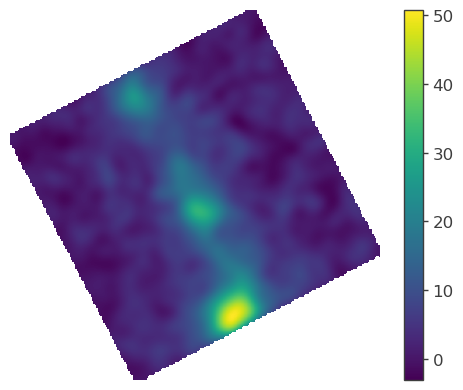

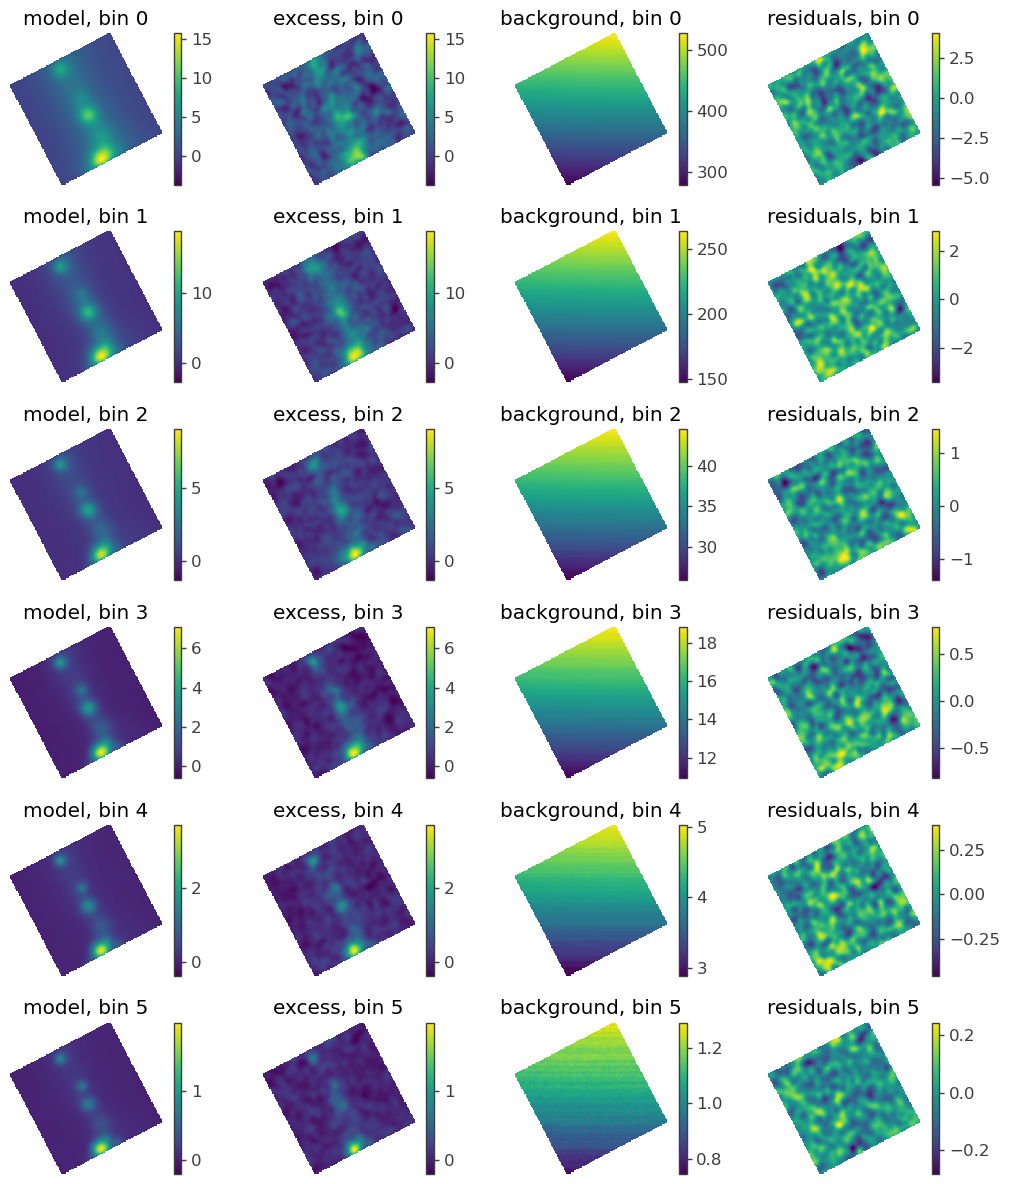

<Figure size 640x480 with 0 Axes>

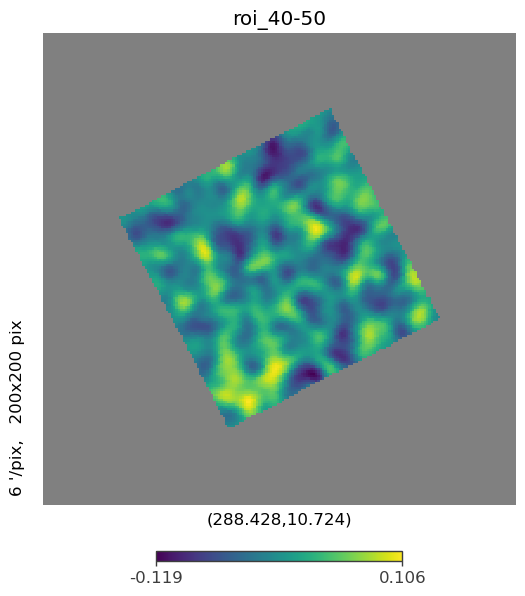

LHAASO:  1 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  2 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  3 286.96 8.44 1WCDA J1907+0826  0.43
LHAASO:  4 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  5 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  6 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAASO:  7 287.88 5.07  1LHAASO J1910+0516*   0.29
LHAASO:  8 288.22 10.25 1LHAASO J1912+1014u  0.36
LHAASO:  9 288.38 10.5 1LHAASO J1912+1014u   0.5
LHAASO:  10 288.28 5.03  1LHAASO J1913+0501  0.0
LHAASO:  11 288.28 5.03  1KM2A J1913+0501  0
LHAASO:  12 288.73 11.84  1LHAASO J1914+1150u  0.21
LHAASO:  13 288.81 11.74  1LHAASO J1914+1150u   0.33
LHAASO:  14 289.78 15.93  1LHAASO J1919+1556  0.0
LHAASO:  15 289.78 15.93  1KM2A J1919+1556  0
LHAASO:  16 290.7 14.06 1LHAASO J1922+1403  0.18
LHAASO:  17 290.73 14.11 1LHAASO J1922+1403   0.0
LHAASO:  18 291.09 16.15 1LHAASO J1924+1609  1.45
LHAASO:  19 290.53 15.71 1LHAASO J1924+1609   1.22
TeVCat:  1 284.3295833333333 5.189166666666667 3HWC J1857+051 0.0
TeVC

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.93 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1474.493227
total       1474.493227

Values of statistical measures:

statistical measures
AIC           2950.986477
BIC           2961.102220

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.57 +/- 0.16) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1551.758922
total       1551.758922

Values of statistical measures:

statistical measures
AIC           3105.517865
BIC           3115.633608

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.31 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1497.644836
total       1497.644836

Values of statistical measures:

statistical measures
AIC           2997.289693
BIC           3007.405436

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.05 +/- 0.18) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1436.959556
total       1436.959556

Values of statistical measures:

statistical measures
AIC           2875.919134
BIC           2886.034877

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.94 +/- 0.22) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1421.028494
total       1421.028494

Values of statistical measures:

statistical measures
AIC           2844.057010
BIC           2854.172753

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.22 +/- 0.25) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         1292.81072
total        1292.81072

Values of statistical measures:

statistical measures
AIC           2587.621461
BIC           2597.737204


100%|██████████| 6/6 [00:32<00:00,  5.46s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

22:09:38 INFO      Region of Interest:                                                                   ]8;id=914133;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=43851;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=244236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=384493;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (293.333, 19.535), model radius:      ]8;id=463948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=238509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=148211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=126652;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=624598;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=444660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=809967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=531515;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=241081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=884257;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=653226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=675883;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=180441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=662261;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=555926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=460021;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=872237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=556212;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=916772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=555991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=900166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=234457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=505198;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=604715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=899726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=994338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=110962;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=95465;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=705875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=637191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.705513e+07  1.700429e+07  1.002990          30468  \
1   1   1024   RING  8.489190e+06  8.426235e+06  1.007471          30468   
2   2   1024   RING  1.434030e+06  1.415547e+06  1.013057          30468   
3   3   1024   RING  6.091237e+05  5.965805e+05  1.021025          30468   
4   4   1024   RING  1.638264e+05  1.583030e+05  1.034891          30468   
5   5   1024   RING  4.187371e+04  3.997588e+04  1.047474          30468   

   Area (deg^2)  
0     99.889058  
1     99.889058  
2     99.889058  
3     99.889058  
4     99.889058  
5     99.889058

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=69330;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=672063;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=963185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=295181;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=186395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=904530;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=64574;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=78143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=79657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=824587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=926437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=271865;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

22:09:40 INFO      J1922P1403 in model_radius: 7.0 sf:True pf:True kf:False indexf:False               ]8;id=951307;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=268134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#313\313]8;;\

         INFO      Spec:                                                                               ]8;id=731829;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=955438;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=1.37e-13 kb=(3.70e-14, 2.37e-13) index=-2.62 indexb=(-2.97,-2.27)                             

         INFO      Mor:                                                                                ]8;id=673284;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=616302;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.18 sb=(0.08,0.28) fitrange=0.35                                                         

         INFO      J1924P1609 in roi: 6.0 sf:False pf:False kf:False indexf:False                      ]8;id=123286;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=403663;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=447001;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=80464;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=4.44e-13 kb=(3.40e-14, 8.54e-13) index=-2.54 indexb=(-2.94,-2.14)                             

         INFO      Mor:                                                                                ]8;id=832932;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=652027;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=1.45 sb=(0.90,2.00) fitrange=2.15                                                         

         INFO      J1928P1746u in roi: 6.0 sf:False pf:False kf:False indexf:False                     ]8;id=393130;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=951819;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=424008;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=599702;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=7.90e-14 kb=(2.90e-14, 1.29e-13) index=-2.22 indexb=(-2.47,-1.97)                             

         INFO      Mor:                                                                                ]8;id=656732;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=990013;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.17 sb=(0.07,0.27) fitrange=0.35                                                         

         INFO      J1929P1846u in roi: 6.0 sf:False pf:False kf:False indexf:False                     ]8;id=135132;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=345613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=911394;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=630632;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=2.48e-13 kb=(1.38e-13, 3.58e-13) index=-2.37 indexb=(-2.57,-2.17)                             

         INFO      Mor:                                                                                ]8;id=227020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=600960;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=0.49 sb=(0.39,0.59) fitrange=0.50                                                         

         INFO      J1937P2128 in roi: 6.0 sf:False pf:False kf:False indexf:False                      ]8;id=560258;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=7423;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#306\306]8;;\

         INFO      Spec:                                                                               ]8;id=521244;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=602670;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=2.08e-13 kb=(1.00e-18, 7.98e-13) index=-2.43 indexb=(-3.23,-1.63)                             

         INFO      Mor:                                                                                ]8;id=316297;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=64911;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=1.25 sb=(0.10,2.40) fitrange=4.05                                                         

         INFO      J1945P2424 in model_radius: 7.0 sf:True pf:True kf:False indexf:False               ]8;id=220314;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=124134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#313\313]8;;\

         INFO      Spec:                                                                               ]8;id=567166;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=13545;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#328\328]8;;\
                   K=4.27e-13 kb=(1.00e-18, 9.37e-13) index=-2.56 indexb=(-2.96,-2.16)                             

         INFO      Mor:                                                                                ]8;id=841536;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=845192;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#330\330]8;;\
                   sigma=1.29 sb=(0.74,1.84) fitrange=1.85                                                         

         INFO      Set diffuse range: [46, 62] [-8, 8]                                                 ]8;id=894602;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=558174;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#978\978]8;;\

         INFO      ra dec coner:                                                                       ]8;id=174272;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=185661;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#979\979]8;;\

         INFO      (296.04319324510413, 7.805741642317792)                                             ]8;id=701710;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=254874;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#980\980]8;;\

         INFO      (304.4912371648376, 21.3910013203489)                                               ]8;id=961863;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=398969;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#981\981]8;;\

         INFO      (289.15715314993014, 29.44921503438924)                                             ]8;id=932237;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=219664;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#982\982]8;;\

         INFO      (281.5669824344631, 15.232481778869648)                                             ]8;id=934586;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=687373;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#983\983]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=156706;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=67177;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1022\1022]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 7.7916172035158e-06                                                   ]8;id=896025;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=304176;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1023\1023]8;;\
                  ratio: 0.061487992472267286                                                                      

         INFO      set K to: 1.1024541749666593e-12                                                   ]8;id=71325;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=864058;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1024\1024]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_freeprm_dust_bkg_template.fits          ]8;id=686255;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=994562;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1051\1051]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  7
Particle sources  0

Free parameters (26):
--------------------

                                           value min_value max_value   
J1922P1403.spectrum.main.Powerlaw.K          0.0       0.0       0.0  \
J1922P1403.spectrum.main.Powerlaw.index    -2.62     -2.97     -2.27   
J1924P1609.Gaussian_on_sphere.lon0        291.09    288.94    293.24   
J1924P1609.Gaussian_on_sphere.lat0         16.15      14.0      18.3   
J1924P1609.Gaussian_on_sphere.sigma         1.45       0.9       2.0   
J1924P1609.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1924P1609.spectrum.main.Powerlaw.index    -2.54     -2.94     -2.14   
J1928P1746u.Gaussian_on_sphere.lon0       292.14    291.79    292.49   
J1928P1746u.Gaussian_on_sphere.lat0        17.78     17.43     18.13   
J1928P1746u.Gaussian_on_sphere.sigma        0.17      0.07      0.27   
J1928P1746u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1928P1746u.spectrum.main.Powerlaw.index   -2.22     -2.47     -1.97   
J1929P1846u.Gaussian_on_sphere.lon0       292.34    291.84    292.84   
J1929P1846u.Gaussian_on_sphere.lat0        18.77     18.27     19.27   
J1929P1846u.Gaussian_on_sphere.sigma        0.49      0.39      0.59   
J1929P1846u.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1929P1846u.spectrum.main.Powerlaw.index   -2.37     -2.57     -2.17   
J1937P2128.Gaussian_on_sphere.lon0         294.3    290.25    298.35   
J1937P2128.Gaussian_on_sphere.lat0          21.0     16.95     25.05   
J1937P2128.Gaussian_on_sphere.sigma         1.25       0.1       2.4   
J1937P2128.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1937P2128.spectrum.main.Powerlaw.index    -2.43     -3.23     -1.63   
J1945P2424.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
J1945P2424.spectrum.main.Powerlaw.index    -2.56     -2.96     -2.16   
Diffuse.spectrum.main.Powerlaw.K             0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.733      -4.0      -1.0   

                                                    unit  
J1922P1403.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1922P1403.spectrum.main.Powerlaw.index                   
J1924P1609.Gaussian_on_sphere.lon0                   deg  
J1924P1609.Gaussian_on_sphere.lat0                   deg  
J1924P1609.Gaussian_on_sphere.sigma                  deg  
J1924P1609.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1924P1609.spectrum.main.Powerlaw.index                   
J1928P1746u.Gaussian_on_sphere.lon0                  deg  
J1928P1746u.Gaussian_on_sphere.lat0                  deg  
J1928P1746u.Gaussian_on_sphere.sigma                 deg  
J1928P1746u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1928P1746u.spectrum.main.Powerlaw.index                  
J1929P1846u.Gaussian_on_sphere.lon0                  deg  
J1929P1846u.Gaussian_on_sphere.lat0                  deg  
J1929P1846u.Gaussian_on_sphere.sigma                 deg  
J1929P1846u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1929P1846u.spectrum.main.Powerlaw.index                  
J1937P2128.Gaussian_on_sphere.lon0                   deg  
J1937P2128.Gaussian_on_sphere.lat0                   deg  
J1937P2128.Gaussian_on_sphere.sigma                  deg  
J1937P2128.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1937P2128.spectrum.main.Powerlaw.index                   
J1945P2424.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1945P2424.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (16):
---------------------

                                                                                    value   
J1922P1403.Gaussian_on_sphere.lon0                                                  290.7  \
J1922P1403.Gaussian_on_sphere.lat0                                       

22:09:41 INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=392470;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=804768;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=573901;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=367548;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 11 dec bins for extended source J1924P1609           ]8;id=946907;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=417941;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=676873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=179790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=428031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=751842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=710709;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=983997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1929P1846u           ]8;id=225888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=770759;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=616790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=671686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J1937P2128           ]8;id=964377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=98306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=208782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=855823;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1945P2424            ]8;id=967616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=327527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=991368;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=20359;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=471873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=517212;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.762                      ]8;id=207608;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=588366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=161245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=268343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=869787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=466141;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                
J1922P1403.spectrum.main.Powerlaw.K           (2.37 +/- 0.04) x 10^-22  \
J1922P1403.spectrum.main.Powerlaw.index               -2.270 +/- 0.020   
J1924P1609.Gaussian_on_sphere.lon0          (2.9132 +/- 0.0014) x 10^2   
J1924P1609.Gaussian_on_sphere.lat0              (1.653 +/- 0.017) x 10   
J1924P1609.Gaussian_on_sphere.sigma                      1.05 +/- 0.11   
J1924P1609.spectrum.main.Powerlaw.K           (2.8 -0.6 +0.7) x 10^-22   
J1924P1609.spectrum.main.Powerlaw.index                 -2.58 +/- 0.10   
J1928P1746u.Gaussian_on_sphere.lon0       (2.92170 +/- 0.00025) x 10^2   
J1928P1746u.Gaussian_on_sphere.lat0           (1.7781 +/- 0.0025) x 10   
J1928P1746u.Gaussian_on_sphere.sigma           (1.42 +/- 0.28) x 10^-1   
J1928P1746u.spectrum.main.Powerlaw.K          (7.7 -1.2 +1.5) x 10^-23   
J1928P1746u.spectrum.main.Powerlaw.index                -2.31 +/- 0.10   
J1929P1846u.Gaussian_on_sphere.lon0         (2.9231 +/- 0.0004) x 10^2   
J1929P1846u.Gaussian_on_sphere.lat0             (1.875 +/- 0.004) x 10   
J1929P1846u.Gaussian_on_sphere.sigma           (4.53 +/- 0.34) x 10^-1   
J1929P1846u.spectrum.main.Powerlaw.K       (2.31 -0.22 +0.25) x 10^-22   
J1929P1846u.spectrum.main.Powerlaw.index                -2.40 +/- 0.05   
J1937P2128.Gaussian_on_sphere.lon0          (2.9437 +/- 0.0029) x 10^2   
J1937P2128.Gaussian_on_sphere.lat0                (2.08 +/- 0.04) x 10   
J1937P2128.Gaussian_on_sphere.sigma                      1.24 +/- 0.24   
J1937P2128.spectrum.main.Powerlaw.K           (1.5 -0.5 +0.7) x 10^-22   
J1937P2128.spectrum.main.Powerlaw.index                 -2.48 +/- 0.20   
J1945P2424.spectrum.main.Powerlaw.K             (4.1 +/- 0.6) x 10^-22   
J1945P2424.spectrum.main.Powerlaw.index                 -2.74 +/- 0.11   
Diffuse.spectrum.main.Powerlaw.K           (1.34 -0.22 +0.26) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                    -2.52 +/- 0.09   

                                                     unit  
parameter                                                  
J1922P1403.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1922P1403.spectrum.main.Powerlaw.index                    
J1924P1609.Gaussian_on_sphere.lon0                    deg  
J1924P1609.Gaussian_on_sphere.lat0                    deg  
J1924P1609.Gaussian_on_sphere.sigma                   deg  
J1924P1609.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1924P1609.spectrum.main.Powerlaw.index                    
J1928P1746u.Gaussian_on_sphere.lon0                   deg  
J1928P1746u.Gaussian_on_sphere.lat0                   deg  
J1928P1746u.Gaussian_on_sphere.sigma                  deg  
J1928P1746u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1928P1746u.spectrum.main.Powerlaw.index                   
J1929P1846u.Gaussian_on_sphere.lon0                   deg  
J1929P1846u.Gaussian_on_sphere.lat0                   deg  
J1929P1846u.Gaussian_on_sphere.sigma                  deg  
J1929P1846u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1929P1846u.spectrum.main.Powerlaw.index                   
J1937P2128.Gaussian_on_sphere.lon0                    deg  
J1937P2128.Gaussian_on_sphere.lat0                    deg  
J1937P2128.Gaussian_on_sphere.sigma                   deg  
J1937P2128.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1937P2128.spectrum.main.Powerlaw.index                    
J1945P2424.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1945P2424.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.00  0.00  0.00  0.00 -0.00 ... -0.00 -0.01 -0.01  0.00  0.01  0.00
-0.00  1.00  0.00 -0.01 -0.01 -0.00 ... -0.00  0.00  0.00 -0.00  0.00 -0.00
 0.00  0.00  1.00  0.46 -0.13 -0.08 ... -0.10  0.00 -0.04 -0.01  0.09  0.01
 0.00 -0.01  0.46  1.00 -0.33 -0.28 ... -0.22  0.06 -0.12  0.01  0.26 -0.10
 0.00 -0.01 -0.13 -0.33  1.00  0.78 ...  0.44  0.10  0.28  0.14 -0.54 -0.16
-0.00 -0.00 -0.08 -0.28  0.78  1.00 ...  0.71  0.07  0.46  0.16 -0.87 -0.11
-0.00 -0.01 -0.03  0.17  0.19  0.06 ...  0.02  0.41  0.01  0.24 -0.04 -0.66
-0.00  0.01  0.05  0.14 -0.07 -0.02 ... -0.02  0.00 -0.00  0.01  0.02 -0.01
 0.01 -0.01  0.15  0.18 -0.02 -0.03 ... -0.05 -0.02 -0.04 -0.00  0.08  0.01
 0.01 -0.00 -0.18 -0.21  0.08  0.01 ...  0.03 -0.02  0.01  0.00 -0.01  0.01
 0.02 -0.01 -0.26 -0.27  0.13  0.02 ...  0.08 -0.09  0.03 -0.01 -0.05  0.09
  ...   ...   ...   ...   ...   ... ...   ...   ...   ...   ...   ...   ...
-0.01  0.00 -0.13 -0.24  0.09  0.21 ...  0.14  0.09  0.14  0.06 -0.29 -0.09
-0.03  0.01 -0.17 -0.29 -0.01  0.17 ...  0.14  0.09  0.16  0.00 -0.32  0.00
 0.03 -0.01  0.02  0.04  0.21  0.16 ...  0.09  0.04  0.05  0.15 -0.06 -0.24
 0.01 -0.01  0.03  0.06 -0.16 -0.26 ... -0.20 -0.18 -0.32 -0.09  0.30  0.13
-0.01 -0.00 -0.02 -0.07  0.26  0.35 ...  0.31  0.43 -0.13  0.04 -0.35 -0.33
 0.00 -0.00 -0.07 -0.13  0.24  0.38 ...  0.72  0.11 -0.10 -0.01 -0.44 -0.10
-0.00 -0.00 -0.10 -0.22  0.44  0.71 ...  1.00 -0.13  0.25  0.09 -0.82  0.01
-0.01  0.00  0.00  0.06  0.10  0.07 ... -0.13  1.00 -0.04  0.08 -0.01 -0.64
-0.01  0.00 -0.04 -0.12  0.28  0.46 ...  0.25 -0.04  1.00  0.29 -0.53  0.01
 0.00 -0.00 -0.01  0.01  0.14  0.16 ...  0.09  0.08  0.29  1.00 -0.12 -0.36
 0.01  0.00  0.09  0.26 -0.54 -0.87 ... -0.82 -0.01 -0.53 -0.12  1.00  0.01
 0.00 -0.00  0.01 -0.10 -0.16 -0.11 ...  0.01 -0.64  0.01 -0.36  0.01  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8632.336345
total       8632.336345

Values of statistical measures:

statistical measures
AIC          17316.680371
BIC          17579.693674

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
%matplotlib inline
#####   Data Initialize

# maptree = "../../data/gcd_new.root"


# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"

# response = "../../data/DR_ihep_mk_luoyu.root"
# response = "../../data/DR_ihep_mk_MC1.root"
# response = "../../data/DR_ihep_mk_MC2.root"
# response = "../../data/DR_ihep_MK2_luoyu.root"

region_name="Diffuse_WCDA_freeprm"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix


pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(15,365,10))): #[75]
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.0
    model_radius = 7.0

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.1)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    # WCDA.psf_integration_method="fast"

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=5, rtflux=10, rtindex=5, rtp=5,  detector="WCDA", roi=roi, pf=False, sf=False,  mkf=False, mindexf=False)

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, name=region_name, ifreturnratio=True
                )
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


In [8]:
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    dkf.append(resultsall[i][2])
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall2.npy",results)

In [7]:
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    dkf.append(resultsall[i][2])
oldresults=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
oldresults = np.array(oldresults)
oldresults[:,0][0] =75
oldresults = oldresults[:,0]

In [8]:
region_name="Diffuse_WCDA_fprm"
results = np.load(f"../res/{region_name}/resultsall2.npy")
gc=results[0]
dk=results[1]
den=results[3]
dep=results[4]
di = results[5]
die = results[6]
dien = results[7]
diep = results[8]
dkf = results[9]
results[:,6] = oldresults
np.save(f"../res/{region_name}/resultsall2.npy",results)

Text(0.5, 0, '$GLON^{o}$')

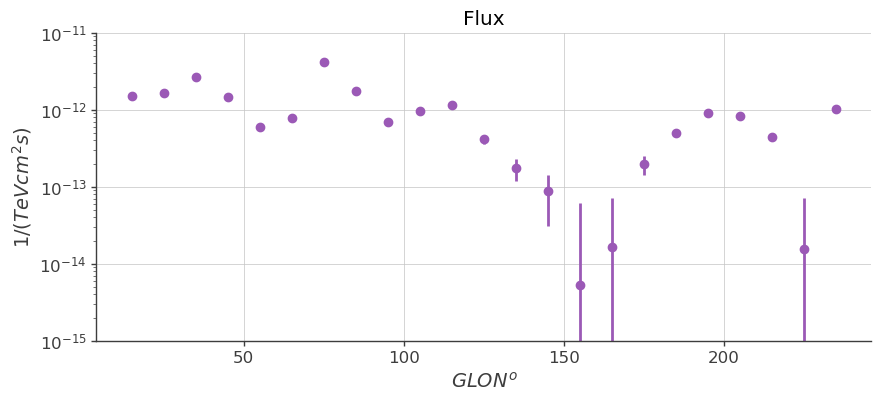

In [9]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o") #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")

Text(0.5, 0, '$GLON^{o}$')

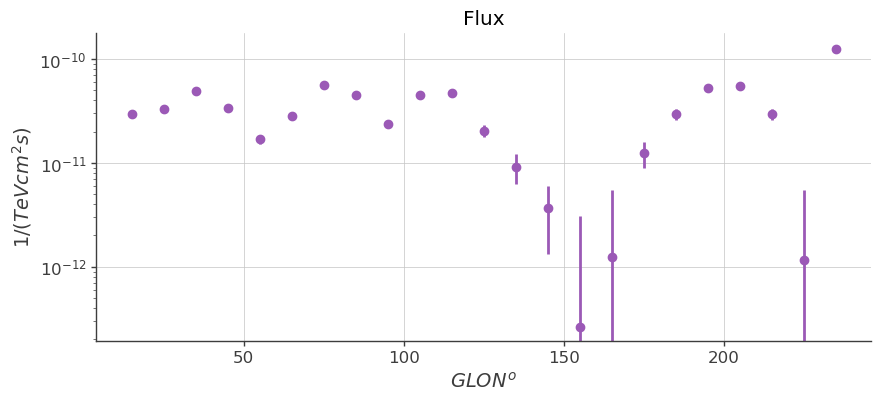

In [10]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o") #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
# plt.ylim(1e-15, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")

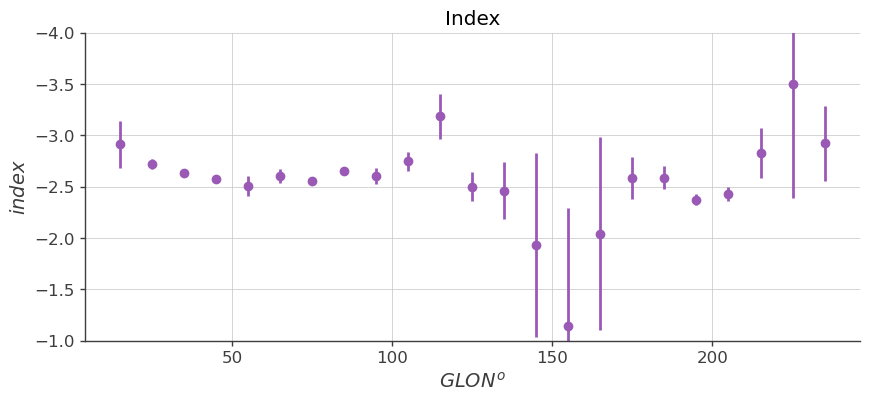

In [11]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o") #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()

roi_10-20


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_20-30


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_30-40


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_40-50


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_50-60


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_60-70


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

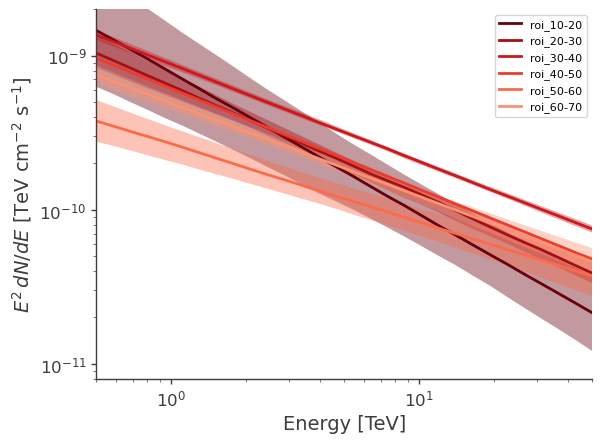

In [24]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=2e-9
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:6]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()

In [ ]:
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:8]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()

In [ ]:
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[8:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()

In [ ]:
x_Max=50.
x_Min=0.5
y_Min=0.8e-12
y_Max=2e-10
fig,ax = plt.subplots()
folder_path = "/data/home/cwy/Science/3MLWCDA/Standard/res/Diffuse"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[1].split('-')[0]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[16:23]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Spectrum_Diffuse.txt"
    my.Draw_spectrum_fromfile(specpath, label=name, color=my.colorall[i], subplot=ax)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()